<a href="https://colab.research.google.com/github/rmchauhan03/rmchauhan03/blob/main/BioTech_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract: In this project we take adavantage of the economic catalyst nature of the FDA drug approval, in order to determine optimal trading times. In addition to this, we use fundamental and technical indicators, fed into a convolutional neural net as an image, to better help us tune our entry and exit points. 


Introduction: There is another part of the market, besides crypto and meme-stocks ala Wall-Street-Bets, that can boast 300 or even 400 percent gains in a matter of days. This highly volatile world of bio-tech can thank the FDA drug approval process for its sharp upturns and downturns. The companies involved range from powerhouses such as Pfizer and Johnson and Johnson, to much smaller companies that often only have one or two drugs in development. 
These smaller companies fortunes rely on the verdict of the FDA, and as such are subject to enormous swings once the decision comes through. 

In this project, we use this as the fundamental idea. We either buy or sell the
bio-tech stock based on whether the approval catalyst is on the calendar. We then use the second core idea of the project to implement the strategy, the convolutional neural net.

My partner and I, saw an article on Towards Data Science, that used technical data, transformed it into a grayscale image, then fed it into the convulutional neural net to classify it either as a buy, sell or a hold. We applied their idea to their dataset, and used the model to find the optimal buy and sell dates a month after the catalyst date. 

Review of Existing Literature:
In the literature, we did not find much in the way of strategy specifically geared towards trading in the biotech space. A lot of the fundamental papers, were either focused on the sector as a whole or a specific stock, not a strategy specifically geared around the bio-tech space.

Some of the inspiration for the biotech side of the project came years ago while watching a technical analysis youtube video, then the author mentions catalysts to trade off of such as election results, commodities news, and FDA bio-tech approvals. 

As for the machine learning aspect, we drew heavily from the both the original paper and the towards data science webpage and github repo (sources will be at the end). We also the keras and pandas packages for implementation.


Dataset: We used the FDA drug approval csvs from their publicly available data site, and the yfinance package introduced in the homework. We used the FDA's data because we trying to get data on a FDA process, the approvals. The drug data itself did not need much cleaning, as there are no outliers with a drug being approved. The stock data also did not need any cleaning, because yfinance is very reliable, and we needed all the stock data we could get for training the neural network. Yfinance was used over other securities apis because of its high rate limit scheme, and the fact that it was free. 

We did exploratory analysis to determine how many years of data to collect and train on, and whether this project was even feasible. The fact that biotech stocks usually rise and fall after their catalysts, as evidenced by the graphs below, shows the potential for this project. 


Methods:#Andrew
Results:#not yet
Conclusion:#after done

In [ ]:
import numpy as np
import pandas as pd
from re import search
import yfinance as yf
import datetime as dt
from ta import add_all_ta_features
from ta.utils import dropna

In [ ]:
tickerDict = {}
with open("NYSE.txt", mode='r') as nyse:
  linesn = nyse.readlines()
for line in linesn:
  line = line[:len(line)-1]
  arr = line.split("\t", 1)
  arr[1] = arr[1].upper()
  tickerDict[arr[1]] = arr[0];
with open("NASDAQ.txt", mode='r') as nas:
  linesn = nas.readlines()
for line in linesn:
  line = line[:len(line)-1]
  arr = line.split("\t", 1)
  arr[1] = arr[1].upper()
  tickerDict[arr[1]] = arr[0];

print(tickerDict)

{'DESCRIPTION': 'Symbol', 'AGILENT TECHNOLOGIES': 'A', 'ALCOA CORP': 'AA', 'ARES ACQUISITION CORP CL A': 'AAC', 'ARES ACQUISITION CORP UNITS': 'AAC.U', 'ARES ACQUISITION CORP WT': 'AAC.W', 'ARLINGTON ASSET INVESTMENT CORP [AAIC/PB]': 'AAI-B', 'ARLINGTON ASSET INVESTMENT CORP [AAIC/PC]': 'AAI-C', 'ARLINGTON ASSET INVESTMENT CORP': 'AAIC', 'ARLINGTON ASSET INVESTMENT CORP 6.000%': 'AAIN', 'AARONS HOLDINGS COMPANY': 'AAN', 'ADVANCE AUTO PARTS INC': 'AAP', 'ACCELERATE ACQUISITION CORP [AAQC.U]': 'AAQ.U', 'ACCELERATE ACQUISITION CORP WT [AAQC/W]': 'AAQ.W', 'ACCELERATE ACQUISITION CORP CL A': 'AAQC', 'AMERICAN ASSETS TRUST': 'AAT', 'ALLIANCEBERNSTEIN HOLDING LP': 'AB', 'ABB LTD ADR': 'ABB', 'ABBVIE INC': 'ABBV', 'AMERISOURCEBERGEN CORP': 'ABC', 'AMBEV S.A. ADR': 'ABEV', 'ASBURY AUTOMOTIVE GROUP INC': 'ABG', 'ABM INDUSTRIES INC': 'ABM', 'ARBOR REALTY TRUST': 'ABR', 'ARBOR REALTY TRUST INC': 'ABR-F', 'ABBOTT LABORATORIES': 'ABT', 'ASSOCIATED CAPITAL GROUP INC': 'AC', 'ARCOSA INC': 'ACA', 'ATLA

In [ ]:
## This is the code that goes from company name to ticker symbol with time indexing
#csv = pd.read_csv('FDA_2019/DrugsFDA FDA-Approved Drugs (1).csv')
csv = pd.read_csv('data/combined.csv', error_bad_lines=False, engine="python")
#factors = pd.read_csv('FDA_2019/DrugsFDA FDA-Approved Drugs (1).csv')['Company']

#for index, value in factors.items():
#    for key in tickerDict.keys():
#        if search(value, key):
#            print(value, key)

csv['year'] = csv['Approval Date'].str[6:10]
csv['month'] = csv['Approval Date'].str[3:5]
csv['day'] = csv['Approval Date'].str[0:2]
x = pd.to_datetime(csv['Approval Date'])
csv.index = x

names = csv['Company']

toremove = []

for i in range(names.shape[0]):
    found = False
    for key in tickerDict.keys():
        if search(names.iloc[i], key):
            names.iloc[i] = tickerDict[key]
            found = True
            break
    if not found:
        toremove.append(names.iloc[i])
    if(i % 100 == 0):
        print(i)

print(names.head())
            
df = pd.concat([csv['Approval Date'], names], axis=1)
df = df.loc[df["Company"].isin(toremove) == False]
df = df.drop_duplicates()
df.head()

Skipping line 342: ',' expected after '"'
Skipping line 1180: ',' expected after '"'
Skipping line 1951: ',' expected after '"'
Skipping line 2470: ',' expected after '"'
Skipping line 2802: ',' expected after '"'
Skipping line 3067: ',' expected after '"'
Skipping line 3507: ',' expected after '"'
Skipping line 3991: ',' expected after '"'
Skipping line 4216: ',' expected after '"'
Skipping line 4634: ',' expected after '"'
Skipping line 5088: ',' expected after '"'
Skipping line 5577: ',' expected after '"'
Skipping line 5973: ',' expected after '"'
Skipping line 6404: ',' expected after '"'
Skipping line 6935: ',' expected after '"'
Skipping line 7347: ',' expected after '"'
Skipping line 7807: ',' expected after '"'
Skipping line 8274: ',' expected after '"'
Skipping line 8730: ',' expected after '"'
Skipping line 9241: ',' expected after '"'
Skipping line 9702: ',' expected after '"'
Skipping line 10119: ',' expected after '"'
Skipping line 10617: ',' expected after '"'
Skipping l

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
Approval Date
2019-01-02       DR REDDYS LABS SA
2019-01-02    AUROBINDO PHARMA LTD
2019-01-02    AUROBINDO PHARMA LTD
2019-01-02      ALEMBIC PHARMS LTD
2019-01-02     ALIGNSCIENCE PHARMA
Name:

,Approval Date,Company
Approval Date,,
2019-01-04,01/04/2019,NVS
2019-01-04,01/04/2019,CTLT
2019-01-07,01/07/2019,GSK
2019-01-10,01/10/2019,NVS
2019-01-10,01/10/2019,NBIX


In [ ]:
df.to_csv('approvaldates.csv')

In [ ]:
df = pd.read_csv('approvaldates.csv', error_bad_lines=False, engine="python")

c:\users\sukisha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# taken from  nayash / stock_cnn_blog_pub
def create_labels(df, col_name, window_size=11):
        """
        Data is labeled as per the logic in research paper
        Label code : BUY => 1, SELL => 0, HOLD => 2
        params :
            df => Dataframe with data
            col_name => name of column which should be used to determine strategy
        returns : numpy array with integer codes for labels with
                  size = total-(window_size)+1
        """

        row_counter = 0
        total_rows = len(df)
        labels = np.zeros(total_rows)
        labels[:] = np.nan

        while row_counter < total_rows:
            if row_counter >= window_size - 1:
                window_begin = row_counter - (window_size - 1)
                window_end = row_counter
                window_middle = (int)((window_begin + window_end) / 2)
                
                min_ = np.inf
                min_index = -1
                max_ = -np.inf
                max_index = -1
                for i in range(window_begin, window_end + 1):
                    price = df.iloc[i][col_name]
                    if price < min_:
                        min_ = price
                        min_index = i
                    if price > max_:
                        max_ = price
                        max_index = i

                if max_index == window_middle:
                    labels[window_middle] = 0
                elif min_index == window_middle:
                    labels[window_middle] = 1
                else:
                    labels[window_middle] = 2

            row_counter = row_counter + 1

        return labels

In [ ]:
dates = pd.to_datetime(df['Approval Date'])

ticker = yf.Ticker("NVS")
hist = ticker.history( start=dates.iloc[0] - dt.timedelta(7*4), end=dates.iloc[0] + dt.timedelta(7*4))
hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
hist['TimeToApproval'] = (dates.iloc[0] - hist.index).days
hist['Labels'] = create_labels(hist, 'Open')
hist = hist.dropna()

print(hist.head())

finaldf = hist

for i in range(df.shape[0]):
    if (i != 0):
        try:
            ticker = yf.Ticker(df['Company'].iloc[i])
            hist = ticker.history( start=dates.iloc[i] - dt.timedelta(7*4), end=dates.iloc[i] + dt.timedelta(7*4))
            hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
            hist['TimeToApproval'] = (dates.iloc[i] - hist.index).days
            hist['Labels'] = create_labels(hist, 'Open')
            hist = hist.dropna()
            finaldf = pd.concat([finaldf,hist], ignore_index=True)

        except:
            print("Yfinance error")
    if(i % 100 == 0):
        print(i)


                 Open       High        Low      Close   Volume  \
Date                                                              
2018-12-14  70.194718  70.790609  70.138345  70.371872  2748150   
2018-12-17  69.751811  69.880656  68.914338  69.059288  3427236   
2018-12-18  69.083448  69.204243  68.382876  68.761345  3056724   
2018-12-19  68.688876  69.204246  67.497089  68.004402  4332089   
2018-12-20  68.592249  68.592249  67.400462  67.827248  7128115   

            TimeToApproval  Labels  
Date                                
2018-12-14              21     2.0  
2018-12-17              18     2.0  
2018-12-18              17     2.0  
2018-12-19              16     2.0  
2018-12-20              15     2.0  
0
- SCPL: Data doesn't exist for startDate = 1545120000, endDate = 1549958400
Yfinance error
- AMAM: Data doesn't exist for startDate = 1545379200, endDate = 1550217600
Yfinance error
- SCPL: Data doesn't exist for startDate = 1545379200, endDate = 1550217600
Yfinance er

- FNB-E: No data found, symbol may be delisted
Yfinance error
- BAR.W: No data found, symbol may be delisted
Yfinance error


In [ ]:
finaldf.to_csv('priceanddates.csv')

In [ ]:
finaldf.head

<bound method NDFrame.head of             Open       High        Low      Close      Volume  TimeToApproval  \
0      70.194718  70.790609  70.138345  70.371872   2748150.0              21   
1      69.751811  69.880656  68.914338  69.059288   3427236.0              18   
2      69.083448  69.204243  68.382876  68.761345   3056724.0              17   
3      68.688876  69.204246  67.497089  68.004402   4332089.0              16   
4      68.592249  68.592249  67.400462  67.827248   7128115.0              15   
...          ...        ...        ...        ...         ...             ...   
33529  33.620491  34.029072  33.571847  33.990158  16342400.0             -14   
33530  34.058256  34.466841  34.009616  34.447384  21896100.0             -17   
33531  34.505754  34.885152  34.350104  34.855968  25022400.0             -18   
33532  34.855968  34.982432  34.165267  34.817055  42540100.0             -19   
33533  34.564123  34.992164  34.554396  34.797600  24729800.0             -20  

In [ ]:
# taken from  nayash / stock_cnn_blog_pub

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib import pyplot as plt

from sklearn.utils import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall 
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

In [ ]:
# referenced  nayash / stock_cnn_blog_pub
x_train, x_test, y_train, y_test = train_test_split(finaldf.loc[:, 'Open':'TimeToApproval'].values, finaldf['Labels'].values, train_size=0.8,  test_size=0.2, random_state=2, shuffle=True, stratify=finaldf['Labels'].values)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2, random_state=2, shuffle=True, stratify=y_train)

In [ ]:
# referenced  nayash / stock_cnn_blog_pub

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers import Activation, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', padding='same', strides=(1,1), input_shape=(2, 3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu', padding='same', strides=(1, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy', f1_metric])

model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 2, 3, 32)          896       
                                                                 
 dropout_52 (Dropout)        (None, 2, 3, 32)          0         
                                                                 
 conv2d_46 (Conv2D)          (None, 2, 3, 64)          18496     
                                                                 
 dropout_53 (Dropout)        (None, 2, 3, 64)          0         
                                                                 
 flatten_21 (Flatten)        (None, 384)               0         
                                                                 
 dense_50 (Dense)            (None, 100)               38500     
                                                                 
 activation_33 (Activation)  (None, 100)             

In [ ]:
# referenced  nayash / stock_cnn_blog_pub
mm_scaler = MinMaxScaler(feature_range=(0, 1))
x_train = mm_scaler.fit_transform(x_train)
x_test = mm_scaler.transform(x_test)
x_cv = mm_scaler.transform(x_cv)

In [ ]:
# referenced  nayash / stock_cnn_blog_pub
x_train = reshape_as_image(x_train, 3, 2)
x_test = reshape_as_image(x_test, 3, 2)
x_cv = reshape_as_image(x_cv, 3, 2)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)

In [ ]:
print(x_cv.shape)

(5366, 2, 3, 3)


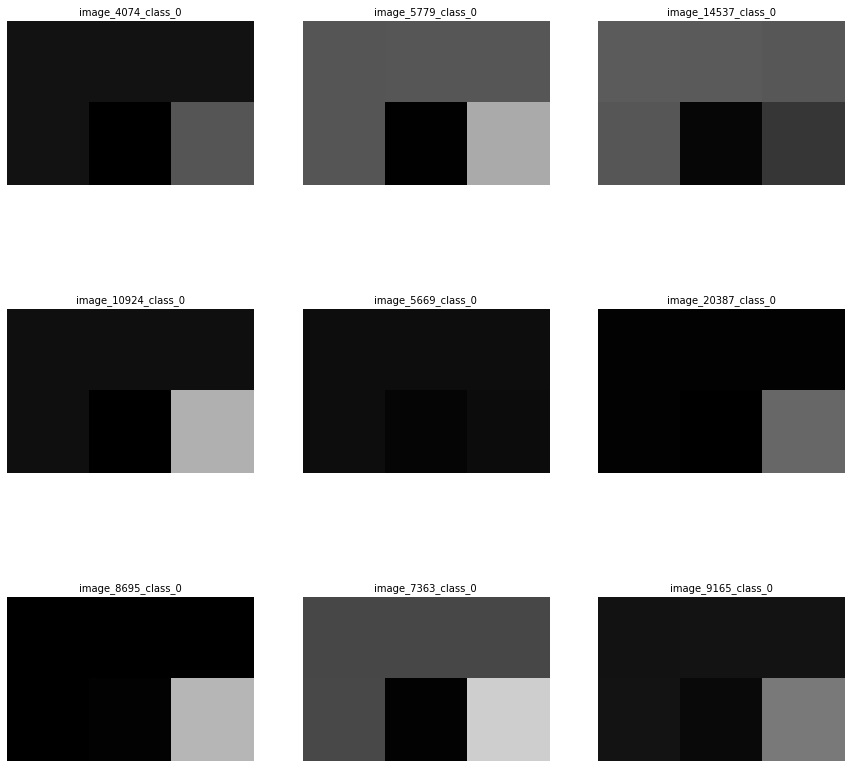

In [ ]:
# referenced  nayash / stock_cnn_blog_pub
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()

In [ ]:
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 0] = 10
sample_weight[y_train == 1] = 10

In [ ]:
# referenced  nayash / stock_cnn_blog_pub
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
y_test = one_hot_enc.fit_transform(y_test.reshape(-1, 1))
y_cv = one_hot_enc.fit_transform(y_cv.reshape(-1, 1))

In [ ]:
model.fit(x_train, y_train, verbose = 1, shuffle=True, epochs=10,validation_data=(x_cv, y_cv),sample_weight=sample_weight)

Epoch 1/10
671/671 [==============================] - 3s 3ms/step - loss: 2.3165 - accuracy: 0.8764 - f1_metric: 0.0784 - val_loss: 0.9325 - val_accuracy: 0.8763 - val_f1_metric: 0.0000e+00
Epoch 2/10
671/671 [==============================] - 2s 3ms/step - loss: 2.2918 - accuracy: 0.8764 - f1_metric: 0.0000e+00 - val_loss: 0.8991 - val_accuracy: 0.8763 - val_f1_metric: 0.0000e+00
Epoch 3/10
671/671 [==============================] - 2s 3ms/step - loss: 2.2918 - accuracy: 0.8763 - f1_metric: 0.0000e+00 - val_loss: 0.9614 - val_accuracy: 0.8763 - val_f1_metric: 0.0000e+00
Epoch 4/10
671/671 [==============================] - 2s 3ms/step - loss: 2.2924 - accuracy: 0.8764 - f1_metric: 0.0000e+00 - val_loss: 0.9298 - val_accuracy: 0.8763 - val_f1_metric: 0.0000e+00
Epoch 5/10
671/671 [==============================] - 2s 4ms/step - loss: 2.2926 - accuracy: 0.8762 - f1_metric: 0.0000e+00 - val_loss: 0.9163 - val_accuracy: 0.8763 - val_f1_metric: 0.0000e+00
Epoch 6/10
671/671 [==============

In [ ]:
model.evaluate(x_test, y_test)

210/210 [==============================] - 0s 1ms/step - loss: 0.9173 - accuracy: 0.8764 - f1_metric: 0.0000e+00


[0.9172862768173218, 0.8763977885246277, 0.0]

In [ ]:
results = model.predict(x_test)

decisions = [0, 0, 0]
#the model really likes holding, so over a period of time, one strategy would be to check over the period for the highest buy and highest sell values

for a in results:
    print(a)
    if a[0] < 0.31 and a[1] < 0.2965:
        decisions[2] += 1
    else:
        if a[0] > a[1]:
            decisions[0] += 1
        else:
            decisions[1] += 1
decisions


[0.29160702 0.29587513 0.4125178 ]
[0.28885543 0.29597402 0.4151705 ]
[0.29189026 0.29595146 0.41215837]
[0.29045644 0.29283938 0.4167042 ]
[0.28971207 0.29482666 0.41546133]
[0.2881542  0.29535982 0.41648602]
[0.2900415  0.29325166 0.4167068 ]
[0.28915116 0.2959344  0.41491443]
[0.292274   0.29523772 0.4124883 ]
[0.28982267 0.29602617 0.41415122]
[0.2905369  0.29228067 0.41718245]
[0.28994694 0.29606462 0.41398844]
[0.28770423 0.2901348  0.42216098]
[0.28505072 0.29637277 0.41857645]
[0.29395673 0.2901984  0.4158449 ]
[0.2890341  0.29353568 0.41743025]
[0.2892843  0.29335755 0.4173582 ]
[0.28908464 0.29597515 0.4149402 ]
[0.29971066 0.27753776 0.42275158]
[0.29662925 0.2877091  0.4156617 ]
[0.28928855 0.29603174 0.4146797 ]
[0.3108836  0.24949573 0.43962067]
[0.28891027 0.29592976 0.41515997]
[0.29935646 0.2793086  0.421335  ]
[0.29517528 0.28869525 0.4161294 ]
[0.2935377  0.29491782 0.4115444 ]
[0.2856567 0.2904097 0.4239336]
[0.28957298 0.2933537  0.41707328]
[0.2861178  0.2960462  

[0.29502422 0.28999373 0.41498205]
[0.28829768 0.29538187 0.41632044]
[0.29277503 0.2954299  0.41179505]
[0.29625276 0.28657362 0.41717362]
[0.2936995  0.28173682 0.42456362]
[0.294541   0.29177538 0.41368368]
[0.29060024 0.29551196 0.41388783]
[0.30183938 0.27279168 0.42536893]
[0.29014555 0.29551032 0.41434407]
[0.3031096  0.27501246 0.42187792]
[0.28963795 0.29611948 0.4142426 ]
[0.3044978  0.24772766 0.44777453]
[0.28651032 0.29566303 0.41782662]
[0.2902118  0.293324   0.41646427]
[0.2936166  0.28704965 0.4193338 ]
[0.28600597 0.2942793  0.41971475]
[0.2892668  0.29498225 0.41575095]
[0.28813487 0.2951263  0.41673884]
[0.28733614 0.2951781  0.41748574]
[0.2927239  0.2958407  0.41143534]
[0.2923333  0.28961787 0.41804883]
[0.28499883 0.29557565 0.4194255 ]
[0.28904715 0.29534477 0.4156081 ]
[0.2882142  0.29520264 0.41658318]
[0.29136115 0.291123   0.41751584]
[0.29488656 0.28889206 0.41622132]
[0.28990787 0.29106525 0.41902697]
[0.29093313 0.29370794 0.41535893]
[0.2930774  0.295242

[0.2896966  0.29566008 0.41464326]
[0.29143104 0.29482377 0.41374516]
[0.2926806  0.29569614 0.41162327]
[0.28860366 0.29146594 0.41993037]
[0.2915416  0.29000416 0.41845423]
[0.29320315 0.2892553  0.41754153]
[0.29050723 0.29267967 0.41681314]
[0.2868701 0.2958028 0.4173271]
[0.2892417  0.29568842 0.41506994]
[0.2901537  0.29563227 0.41421396]
[0.28977928 0.29614487 0.41407582]
[0.28762034 0.290302   0.4220777 ]
[0.29914585 0.27524066 0.42561355]
[0.28915155 0.2953421  0.41550636]
[0.284911   0.2942169  0.42087206]
[0.29077575 0.2911373  0.41808698]
[0.2896649 0.2895672 0.4207679]
[0.2903413  0.29615977 0.41349897]
[0.30117685 0.27831864 0.42050448]
[0.2858779  0.29579285 0.41832927]
[0.28690028 0.28772902 0.4253707 ]
[0.2885549  0.29343903 0.418006  ]
[0.29044446 0.29315746 0.4163981 ]
[0.28964466 0.29619983 0.4141555 ]
[0.29131863 0.29439887 0.41428244]
[0.2937359  0.293241   0.41302317]
[0.28673172 0.28803837 0.42522994]
[0.29198158 0.295714   0.41230437]
[0.29242253 0.2928606  0.4

[0.29063955 0.29251486 0.4168456 ]
[0.29119608 0.2858084  0.42299548]
[0.29354033 0.27827176 0.42818788]
[0.28874615 0.2949369  0.41631693]
[0.29073068 0.2958189  0.41345042]
[0.2895235 0.2930303 0.4174461]
[0.28546134 0.2963341  0.41820455]
[0.28655633 0.28794932 0.42549437]
[0.29354793 0.2946181  0.411834  ]
[0.29369363 0.29063007 0.4156763 ]
[0.28925493 0.2960525  0.4146926 ]
[0.29824224 0.2815762  0.42018157]
[0.29297253 0.2955079  0.4115196 ]
[0.29157138 0.29548892 0.4129397 ]
[0.28888327 0.29216117 0.4189555 ]
[0.2882014  0.29565385 0.41614473]
[0.29099107 0.29603744 0.4129715 ]
[0.29419872 0.29262677 0.41317448]
[0.29211625 0.29537147 0.41251227]
[0.2934578  0.29127467 0.4152675 ]
[0.28792804 0.29383218 0.4182398 ]
[0.29297358 0.2957893  0.41123715]
[0.29048824 0.29499912 0.41451263]
[0.28686613 0.2946429  0.418491  ]
[0.30212936 0.27177584 0.42609477]
[0.29180858 0.2955239  0.41266748]
[0.28547445 0.29309005 0.4214355 ]
[0.29113987 0.29317403 0.4156861 ]
[0.29262334 0.2951777  

[0.3031464  0.27061787 0.42623568]
[0.2924294 0.2905754 0.4169952]
[0.2862493  0.29566342 0.41808724]
[0.28969997 0.29119575 0.41910434]
[0.2899174  0.2961112  0.41397136]
[0.28581074 0.2905597  0.4236295 ]
[0.28939134 0.29617098 0.41443762]
[0.28758505 0.29309472 0.41932026]
[0.28555825 0.29633394 0.41810775]
[0.28921568 0.292937   0.4178473 ]
[0.2937807  0.29232338 0.4138959 ]
[0.29379404 0.29372954 0.41247642]
[0.2893065  0.29501045 0.4156831 ]
[0.28939316 0.2927756  0.41783124]
[0.29033387 0.28987005 0.41979614]
[0.29119343 0.29441434 0.41439223]
[0.29061756 0.2960484  0.41333404]
[0.28906885 0.29229486 0.4186363 ]
[0.29909158 0.27500656 0.42590186]
[0.28944638 0.28547448 0.42507914]
[0.2903559  0.29611847 0.41352558]
[0.2921428  0.29492208 0.4129351 ]
[0.28560546 0.2944569  0.41993767]
[0.2899143  0.29616788 0.4139178 ]
[0.3012926  0.27340803 0.4252994 ]
[0.28976426 0.29622284 0.41401297]
[0.29007566 0.29605022 0.41387415]
[0.2908265 0.295784  0.4133895]
[0.28859806 0.29288188 0.4

[0.2930076  0.2925806  0.41441184]
[0.2881019 0.2955266 0.4163715]
[0.2902622  0.29112685 0.41861093]
[0.29250973 0.2958359  0.41165432]
[0.28383598 0.29665136 0.41951272]
[0.2858081  0.29593462 0.41825727]
[0.29641125 0.28002056 0.4235682 ]
[0.28898433 0.29523924 0.41577646]
[0.2952006  0.2871461  0.41765332]
[0.28549936 0.29496798 0.4195327 ]
[0.28583813 0.29583666 0.41832528]
[0.29444018 0.28931257 0.41624722]
[0.29497376 0.29445437 0.4105719 ]
[0.2889137  0.29304296 0.41804335]
[0.31951615 0.23981313 0.44067067]
[0.2906386  0.2957086  0.41365284]
[0.3067681  0.26393613 0.42929578]
[0.28999245 0.29632193 0.41368562]
[0.29129463 0.2960318  0.41267353]
[0.2908449  0.28881547 0.42033964]
[0.289993   0.29485646 0.4151506 ]
[0.2941081  0.29229513 0.41359678]
[0.2937894  0.29072917 0.41548142]
[0.29316264 0.29193127 0.41490608]
[0.28918433 0.29548523 0.41533047]
[0.28485563 0.294485   0.4206594 ]
[0.28663132 0.2919051  0.42146364]
[0.28550762 0.2945927  0.41989973]
[0.29156542 0.29531348 

[0.28912467 0.29609296 0.41478243]
[0.28631744 0.29614857 0.41753405]
[0.2888374  0.29241765 0.418745  ]
[0.29365858 0.29017416 0.41616723]
[0.2937828  0.29416397 0.41205317]
[0.2883206  0.295352   0.41632736]
[0.29102013 0.2925017  0.41647816]
[0.2912847  0.29245263 0.4162627 ]
[0.29415178 0.29009426 0.41575396]
[0.28518853 0.29205745 0.42275402]
[0.2938724  0.29438314 0.41174448]
[0.29296997 0.2882694  0.41876054]
[0.28814837 0.29537526 0.41647643]
[0.29276782 0.28850093 0.41873124]
[0.28943273 0.2935865  0.4169807 ]
[0.28901243 0.29551324 0.4154743 ]
[0.29205132 0.2939923  0.4139564 ]
[0.28869954 0.28609243 0.42520794]
[0.29413015 0.2914442  0.41442558]
[0.2914678  0.28950122 0.419031  ]
[0.2883738  0.2953505  0.41627574]
[0.28728163 0.29270637 0.42001203]
[0.28936753 0.295051   0.4155815 ]
[0.29540604 0.2900439  0.41455007]
[0.2932911  0.2940818  0.41262713]
[0.29230815 0.29489017 0.41280168]
[0.2894821  0.2942787  0.41623926]
[0.28898042 0.29597434 0.4150452 ]
[0.2953403  0.283459

[0.30198824 0.27538195 0.42262983]
[0.293385   0.29243672 0.4141782 ]
[0.29090455 0.29447773 0.41461778]
[0.2920061  0.2955983  0.41239554]
[0.28583187 0.29587463 0.41829357]
[0.2952275  0.28068262 0.42408988]
[0.29116678 0.29587272 0.41296047]
[0.28688115 0.29567865 0.41744027]
[0.28671092 0.29395232 0.41933677]
[0.29196724 0.2961368  0.411896  ]
[0.290026   0.29154807 0.4184259 ]
[0.2881389  0.29538518 0.41647592]
[0.290379   0.29152566 0.41809535]
[0.2900541  0.29375145 0.41619444]
[0.29132202 0.29495877 0.41371927]
[0.29038417 0.29580534 0.41381043]
[0.2918261 0.2961264 0.4120475]
[0.31924134 0.23980373 0.4409549 ]
[0.2888312  0.2947039  0.41646487]
[0.28543457 0.29613963 0.41842586]
[0.29244494 0.2912799  0.41627517]
[0.29090866 0.29375616 0.41533515]
[0.28687894 0.29575968 0.41736138]
[0.30476645 0.26833913 0.4268944 ]
[0.29206648 0.28777838 0.42015508]
[0.30791345 0.2625963  0.42949027]
[0.29278424 0.2954429  0.41177288]
[0.28758496 0.29541555 0.41699955]
[0.2862362  0.2961844  

[38, 44, 6625]